## Problem Statement
### The data is related with direct marketing campaigns of a Portuguese banking institution. Cluster customers on the basis of attributes.

### https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [7]:
'''Attribute Information(Categorical):

age (numeric)
job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')'''

"Attribute Information(Categorical):\n\nage (numeric)\njob : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\nmarital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\neducation (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\ndefault: has credit in default? (categorical: 'no','yes','unknown')\nhousing: has housing loan? (categorical: 'no','yes','unknown')\nloan: has personal loan? (categorical: 'no','yes','unknown')\ncontact: contact communication type (categorical: 'cellular','telephone')\nmonth: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\nday_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\npoutcome: outcome of the previous marketing campaign (c

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [9]:
path = ('\datasets/bank-full.csv')
df1 = pd.read_csv(path,sep=';')

In [10]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df = df1.copy()

In [12]:
del df['y']

In [13]:
for i in df.columns:
    if df[i].nunique() < 10:
        print(i,':',df[i].unique())

marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
poutcome : ['unknown' 'failure' 'other' 'success']


In [14]:
df = pd.get_dummies(df)

In [15]:
# dimension reduction 

pca = PCA(n_components=2)

dff = pca.fit_transform(df)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99181403 0.00709197]
[647398.82408967  54744.47011355]


In [16]:
df = pd.DataFrame(dff,columns=['column1','column2'])
df

,column1,column2
0,780.732837,1.441493
1,-1333.470313,-104.671732
2,-1360.611783,-179.618944
3,143.419769,-166.385016
4,-1361.387653,-57.617398
...,...,...
45206,-535.951993,719.848086
45207,367.096314,197.184931
45208,4354.343024,860.720542
45209,-693.811135,251.135112


In [18]:
# fit K-means clustering with different number of clusters
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters)

    # Fit k-means model
    cluster_labels = kmeans.fit_predict(df)

    # Calculate metrics
    sse = kmeans.inertia_
    silhouette = silhouette_score(df, kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(df, kmeans.labels_)
    davies_bouldin = davies_bouldin_score(df, kmeans.labels_)

    # Print results
    print(f"For n_clusters={n_clusters}, the average silhouette_score is {silhouette:.3f}")
    print(f"SSE: {sse}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print('---------------------------------------')


For n_clusters=2, the average silhouette_score is 0.845
SSE: 201259789069.39322
Calinski-Harabasz Index: 49612.34481972705
Davies-Bouldin Index: 0.5346713212371279
---------------------------------------
For n_clusters=3, the average silhouette_score is 0.774
SSE: 112635553844.93379
Calinski-Harabasz Index: 62108.6516681491
Davies-Bouldin Index: 0.5195229248334448
---------------------------------------
For n_clusters=4, the average silhouette_score is 0.737
SSE: 72698420805.19543
Calinski-Harabasz Index: 72429.55702602415
Davies-Bouldin Index: 0.5195625893047059
---------------------------------------
For n_clusters=5, the average silhouette_score is 0.689
SSE: 48361596107.57002
Calinski-Harabasz Index: 87344.33977938119
Davies-Bouldin Index: 0.5037059801961978
---------------------------------------


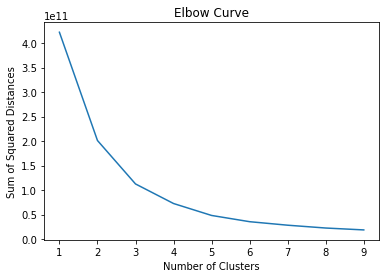

In [ ]:
# Define the range of clusters to test
k_values = range(1, 10)

# Fit k-means for each value of k
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in k_values]

# Get total sum of squared distances for each model
sums_sq = [model.inertia_ for model in kmeans_models]

# Plot the elbow curve
plt.plot(k_values, sums_sq)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [23]:
def gap_statistic(X):
    """
    Computes the gap statistic for a given dataset X
    """
    # Number of clusters to evaluate
    k_range = range(2, 7)
    
    # Run K-means for each value of k
    k_means = [KMeans(n_clusters=k).fit(X) for k in k_range]
    
    # Compute the within-cluster dispersion for each K-means model
    Wks = [k_mean.inertia_ for k_mean in k_means]
    
    # Generate reference datasets to compute the expected dispersion
    B = 10
    B_refs = []
    for i in range(B):
        X_ref = np.random.uniform(np.min(X), np.max(X), size=X.shape)
        k_means_ref = [KMeans(n_clusters=k).fit(X_ref) for k in k_range]
        Wks_ref = [k_mean_ref.inertia_ for k_mean_ref in k_means_ref]
        B_refs.append(Wks_ref)
    
    # Compute the expected dispersion and its standard deviation
    Wks_ref = np.mean(B_refs, axis=0)
    sd_ks_ref = np.std(B_refs, axis=0)
    
    # Compute the gap statistic
    gap = np.log(Wks_ref) - np.log(Wks)
    sd_gap = np.sqrt(1 + 1 / B) * sd_ks_ref
    gap = gap - (gap[1] - gap[0])  # adjust for small k
    
    # Find the optimal number of clusters
    k_opt = k_range[np.argmax(gap)]
    
    return k_opt


In [24]:
gap_statistic(df)

2

# A result, to determine optimum cluster number in this case with K-means algorithm:
## Silhouette : 2_clusters
## Elbow : 3_clusters
## Gap statistics : 2_clusters

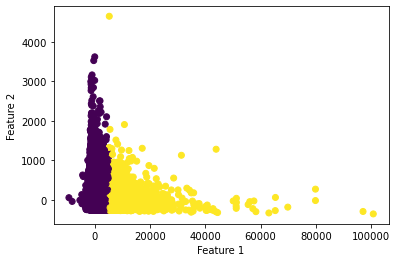

In [25]:
# fit K-means clustering with 2 clusters
kmeans = KMeans(2)
cluster_labels = kmeans.fit_predict(df)

# Plotting the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [26]:
# fit DBSCAN clustering 
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(df)

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# Print the number of clusters
print('Number of clusters found: ', num_clusters)

# calculate silhouette score
silhouette_avg = silhouette_score(df,clusters)
print(silhouette_avg)

Number of clusters found:  277
-0.41354861974778423


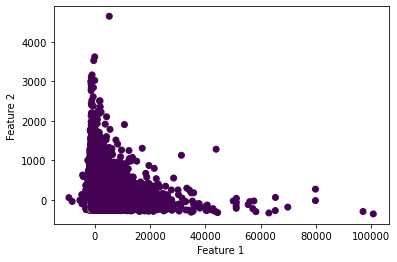

In [27]:
# Plotting the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
